## Assignment 1

Yana RAGOZINA - Thomas PAUL

SI5 IAID FISA

In [1]:
import numpy as np

### Exercise 1

In [2]:
def f(x):
    return 2*x**4 - 4*x**3 + 3*x**2 + 4*x - 3

In [3]:
## 1. derivative
def der_f(x):
    return 8*x**3 - 12*x**2 + 6*x + 4

In [4]:
## 2. gradient descent algorithm

alpha = 0.1

def gradient_descent(x):
    x = x - alpha * der_f(x)
    return x

In [5]:
## 3. 

## case 1 : x = 0

x = 0

# step 1:
x = gradient_descent(x)

print("x = 0, step 1 : ", x)

# step 2:
x = gradient_descent(x)

print("x = 0, step 2 : ", x)



## case 2 : x = 10

x = 10

# step 1:
x = gradient_descent(x)

print("x = 10, step 1 : ", x)

# step 2:
x = gradient_descent(x)

print("x = 10, step 2 : ", x)

x = 0, step 1 :  -0.4
x = 0, step 2 :  -0.31679999999999997
x = 10, step 1 :  -676.4000000000001
x = 10, step 2 :  248120326.78720012


### Exercise 2

#### Example 1 - linear samples

In [102]:
alpha = 0.001

X = np.array([1, 2, 3, 4, 8, 15, 30, 37, 55, 71, 99])
y_true = np.array([1, 2, 3, 4, 8, 15, 30, 37, 55, 71, 99])

#random initial parameter initialization
t0 = 1
t1 = 5

nb_epochs = 50

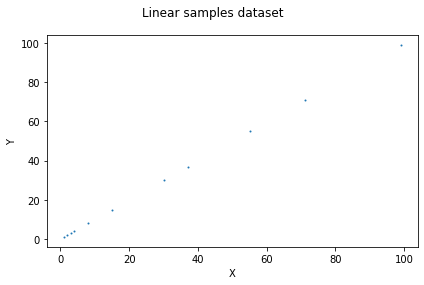

In [103]:
from matplotlib import pyplot as plt
# plot the initial distribution
fig, axs = plt.subplots(1, 1)
fig.suptitle('Linear samples dataset')
axs.scatter(X, y_true, s=1)
axs.set_xlabel('X')
axs.set_ylabel('Y')
plt.tight_layout()
plt.show()

In [104]:
def h_theta(theta0, theta1, j):
    return theta0 + theta1 * j

##### 1. simultaneous updates

In [105]:
def linear_regression_sim(theta0, theta1, x, y):

    y_pred = []

    #calculate the estimated values
    for i in range(len(x)):
        y_pred.append(h_theta(theta0, theta1, x[i]))

    #simultaneous parameter update
    theta0 = theta0 - alpha * (np.sum(np.array(y_pred) - y) / len(x))
    theta1 = theta1 - alpha * (np.sum((np.array(y_pred) - y) * x) / len(x))

    return theta0, theta1



1. a. mini-batch gradient descent

In [106]:
# mini-batch gradient descent

#create a random batch
batch_size = 5
random_indices = np.random.choice(len(X), batch_size)
X_batch = X[random_indices]
y_batch = y_true[random_indices]

# calculate gradient descent
for i in range(nb_epochs):
    t0, t1 = linear_regression_sim(t0, t1, X_batch, y_batch)
    print("epoch ", i, " theta0 = ", t0, " theta1 = ", t1)

epoch  0  theta0 =  0.9398  theta1 =  3.1532
epoch  1  theta0 =  0.90699284  theta1 =  2.1531253599999998
epoch  2  theta0 =  0.8890195918320001  theta1 =  1.6115704510879998
epoch  3  theta0 =  0.8790793295640656  theta1 =  1.3183136945305822
epoch  4  theta0 =  0.873489207555449  theta1 =  1.1595156483580273
epoch  5  theta0 =  0.8702548867521948  theta1 =  1.0735298411382301
epoch  6  theta0 =  0.8682963902165968  theta1 =  1.0269734015729883
epoch  7  theta0 =  0.8670288874830999  theta1 =  1.0017687970773541
epoch  8  theta0 =  0.866135680398872  theta1 =  0.988126660481176
epoch  9  theta0 =  0.8654452701433517  theta1 =  0.9807458419108941
epoch  10  theta0 =  0.8648647864129271  theta1 =  0.976755656317583
epoch  11  theta0 =  0.8643439379130139  theta1 =  0.9746015668852186
epoch  12  theta0 =  0.8638554907851996  theta1 =  0.9734417589706759
epoch  13  theta0 =  0.8633846972616485  theta1 =  0.9728203720984854
epoch  14  theta0 =  0.8629235710573292  theta1 =  0.9724905481579

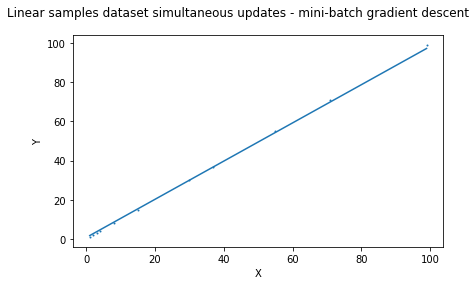

In [107]:
# plot the distribution + the resulting parameters
fig, axs = plt.subplots(1, 1)
fig.suptitle('Linear samples dataset simultaneous updates - mini-batch gradient descent')
axs.scatter(X, y_true, s=1)
axs.set_xlabel('X')
axs.set_ylabel('Y')
n = np.linspace(min(X), max(X), 10)
axs.plot(n, t0 + t1 * n)
plt.tight_layout()
plt.show()

1. b. batch gradient descent

In [108]:

# batch gradient descent

#reinitialize the parameters
t0 = 1
t1 = 5

# calculate gradient descent
for i in range(nb_epochs):
    t0, t1 = linear_regression_sim(t0, t1, X, y_true)
    print("epoch ", i, " theta0 = ", t0, " theta1 = ", t1)

epoch  0  theta0 =  0.8808181818181818  theta1 =  -2.4677272727272728
epoch  1  theta0 =  0.9823929421487604  theta1 =  3.9546450413223138
epoch  2  theta0 =  0.8941142184402705  theta1 =  -1.5686769610818931
epoch  3  theta0 =  0.9691128326174316  theta1 =  3.1814775950942007
epoch  4  theta0 =  0.903690972657031  theta1 =  -0.9037120302014854
epoch  5  theta0 =  0.959033318940327  theta1 =  2.6096270617674104
epoch  6  theta0 =  0.910517122432804  theta1 =  -0.4118826997878613
epoch  7  theta0 =  0.9513213214404671  theta1 =  2.1866757147003244
epoch  8  theta0 =  0.9153091267301534  theta1 =  -0.048108937450883626
epoch  9  theta0 =  0.945360672573563  theta1 =  1.8738540488555278
epoch  10  theta0 =  0.9185968968211671  theta1 =  0.2209516135895071
epoch  11  theta0 =  0.9406956386137468  theta1 =  1.6424871365494846
epoch  12  theta0 =  0.9207723684861711  theta1 =  0.4199598219431955
epoch  13  theta0 =  0.9369891468329996  theta1 =  1.4713662603426438
epoch  14  theta0 =  0.9221

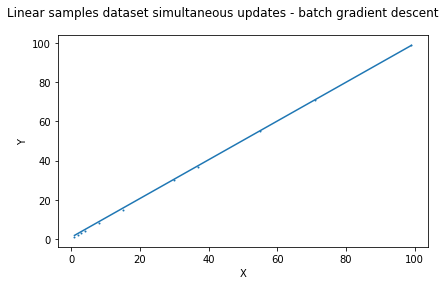

In [109]:
# plot the distribution + the resulting parameters
fig, axs = plt.subplots(1, 1)
fig.suptitle('Linear samples dataset simultaneous updates - batch gradient descent')
axs.scatter(X, y_true, s=1)
axs.set_xlabel('X')
axs.set_ylabel('Y')
n = np.linspace(min(X), max(X), 10)
axs.plot(n, t0 + t1 * n)
plt.tight_layout()
plt.show()

1. c. stochastic gradient descent

In [110]:
# stochastic gradient descent

#reinitialize the parameters
t0 = 1
t1 = 5

# calculate gradient descent
for i in range(nb_epochs):

    #get a random sample
    batch_size = 1
    random_indices = np.random.choice(len(X), batch_size)

    X_batch = X[random_indices]
    y_batch = y_true[random_indices]
    
    t0, t1 = linear_regression_sim(t0, t1, X_batch, y_batch)
    print("epoch ", i, " theta0 = ", t0, " theta1 = ", t1)

epoch  0  theta0 =  0.967  theta1 =  4.736
epoch  1  theta0 =  0.827801  theta1 =  -0.4143630000000007
epoch  2  theta0 =  0.828387562  theta1 =  -0.4137764380000007
epoch  3  theta0 =  0.830386727314  theta1 =  -0.4097781073720007
epoch  4  theta0 =  0.907094136492146  theta1 =  3.8091293974260316
epoch  5  theta0 =  0.8640501013942634  theta1 =  3.1634688709577925
epoch  6  theta0 =  0.6490026330680477  theta1 =  -18.126230493337562
epoch  7  theta0 =  0.72485855240833  theta1 =  -17.822806815976435
epoch  8  theta0 =  2.5875915686375888  theta1 =  166.58776179072018
epoch  9  theta0 =  2.419416215278231  theta1 =  166.41958643736083
epoch  10  theta0 =  2.251577212625592  theta1 =  166.2517474347082
epoch  11  theta0 =  1.91882214054355  theta1 =  165.58623729054412
epoch  12  theta0 =  -3.020683800313318  theta1 =  17.40105906483808
epoch  13  theta0 =  -3.6245023019120133  theta1 =  -4.940225494313662
epoch  14  theta0 =  -3.6149375741157876  theta1 =  -4.930660766517436
epoch  15

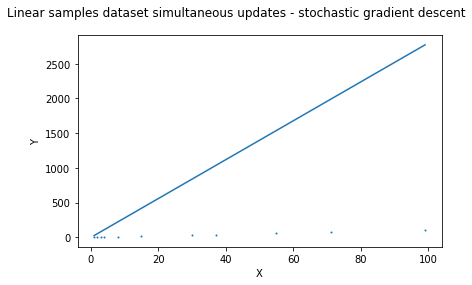

In [112]:
# plot the distribution + the resulting parameters
fig, axs = plt.subplots(1, 1)
fig.suptitle('Linear samples dataset simultaneous updates - stochastic gradient descent')
axs.scatter(X, y_true, s=1)
axs.set_xlabel('X')
axs.set_ylabel('Y')
n = np.linspace(min(X), max(X), 10)
axs.plot(n, t0 + t1 * n)
plt.tight_layout()
plt.show()

2. non-simultaneous updates

In [113]:
def h(x, theta0, theta1):
    #calculate the estimated values
    y_pred = []
    for i in range(len(x)):
        y_pred.append(h_theta(theta0, theta1, x[i]))

    return y_pred

In [114]:
def linear_regression_nsim(param, theta0, theta1, x, y):

    y_pred = h(x, theta0, theta1)

    #non-simultaneous parameter update
    if param == 0:
        theta0 = theta0 - alpha * (np.sum(np.array(y_pred) - y) / len(x))
    else:
        theta1 = theta1 - alpha * (np.sum((np.array(y_pred) - y) * x) / len(x))

    return theta0, theta1

2. a. mini-batch gradient descent

In [115]:
# mini-batch gradient descent

#create a random batch
batch_size = 5
random_indices = np.random.choice(len(X), batch_size)
X_batch = X[random_indices]
y_batch = y_true[random_indices]

# calculate gradient descent
for i in range(nb_epochs):
    #non-simultaneous parameter update
    t0, t1 = linear_regression_nsim(0, t0, t1, X_batch, y_batch)
    t0, t1 = linear_regression_nsim(1, t0, t1, X_batch, y_batch)
    print("epoch ", i, " theta0 = ", t0, " theta1 = ", t1)

epoch  0  theta0 =  -4.268060606862922  theta1 =  27.589310318916503
epoch  1  theta0 =  -4.354196201340375  theta1 =  27.130824862324346
epoch  2  theta0 =  -4.438686809670938  theta1 =  26.680787714927853
epoch  3  theta0 =  -4.5215628010920215  theta1 =  26.23904300712585
epoch  4  theta0 =  -4.602853984515157  theta1 =  25.805437745146364
epoch  5  theta0 =  -4.68258961886414  theta1 =  25.379821757986896
epoch  6  theta0 =  -4.760798423222431  theta1 =  24.962047645333687
epoch  7  theta0 =  -4.8375085867933425  theta1 =  24.551970726441844
epoch  8  theta0 =  -4.912747778676452  theta1 =  24.149448989958678
epoch  9  theta0 =  -4.986543157463635  theta1 =  23.75434304467279
epoch  10  theta0 =  -5.058921380658059  theta1 =  23.36651607117185
epoch  11  theta0 =  -5.129908613919385  theta1 =  22.98583377439232
epoch  12  theta0 =  -5.199530540138399  theta1 =  22.612164337044607
epoch  13  theta0 =  -5.267812368344212  theta1 =  22.245378373897584
epoch  14  theta0 =  -5.334778842

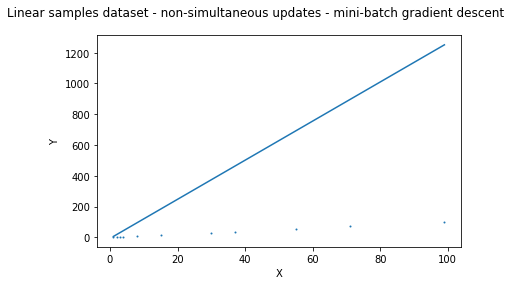

In [116]:
# plot the distribution + the resulting parameters
fig, axs = plt.subplots(1, 1)
fig.suptitle('Linear samples dataset - non-simultaneous updates - mini-batch gradient descent')
axs.scatter(X, y_true, s=1)
axs.set_xlabel('X')
axs.set_ylabel('Y')
n = np.linspace(min(X), max(X), 10)
axs.plot(n, t0 + t1 * n)
plt.tight_layout()
plt.show()

2. b. batch gradient descent

In [117]:
# batch gradient descent

#reinitialize the parameters
t0 = 1
t1 = 5

# calculate gradient descent
for i in range(nb_epochs):
    #non-simultaneous parameter update
    t0, t1 = linear_regression_nsim(0, t0, t1, X, y_true)
    t0, t1 = linear_regression_nsim(1, t0, t1, X, y_true)
    print("epoch ", i, " theta0 = ", t0, " theta1 = ", t1)

epoch  0  theta0 =  0.8808181818181818  theta1 =  -2.464205991735537
epoch  1  theta0 =  0.9822889043012772  theta1 =  3.9486203416328722
epoch  2  theta0 =  0.8941882871214593  theta1 =  -1.5608924112230254
epoch  3  theta0 =  0.9689568291659272  theta1 =  3.1725751616940707
epoch  4  theta0 =  0.9037981516503455  theta1 =  -0.8941302321003457
epoch  5  theta0 =  0.9588572921743872  theta1 =  2.5997611567774626
epoch  6  theta0 =  0.9106327643410606  theta1 =  -0.40197248961288734
epoch  7  theta0 =  0.9511440460425548  theta1 =  2.1769570976660018
epoch  8  theta0 =  0.9154191695654712  theta1 =  -0.03869459895825722
epoch  9  theta0 =  0.9451924544560361  theta1 =  1.8648790804956465
epoch  10  theta0 =  0.9186940164414814  theta1 =  0.2294538853245618
epoch  11  theta0 =  0.9405414576313597  theta1 =  1.634530685502371
epoch  12  theta0 =  0.9208534186475219  theta1 =  0.427385000683149
epoch  13  theta0 =  0.9368507356632358  theta1 =  1.4645089390409343
epoch  14  theta0 =  0.922

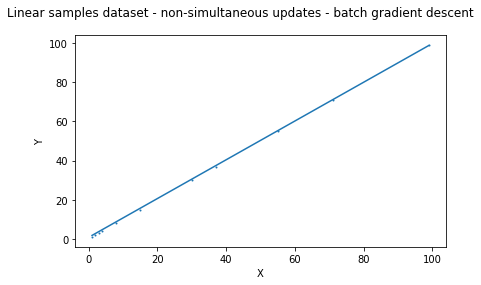

In [118]:
# plot the distribution + the resulting parameters
fig, axs = plt.subplots(1, 1)
fig.suptitle('Linear samples dataset - non-simultaneous updates - batch gradient descent')
axs.scatter(X, y_true, s=1)
axs.set_xlabel('X')
axs.set_ylabel('Y')
n = np.linspace(min(X), max(X), 10)
axs.plot(n, t0 + t1 * n)
plt.tight_layout()
plt.show()

2. c. stochastic gradient descent

In [119]:
# stochastic gradient descent

#reinitialize the parameters
t0 = 1
t1 = 5

# calculate gradient descent
for i in range(nb_epochs):

    #get a random sample
    batch_size = 1
    random_indices = np.random.choice(len(X), batch_size)

    X_batch = X[random_indices]
    y_batch = y_true[random_indices]
    
    #non-simultaneous parameter update
    t0, t1 = linear_regression_nsim(0, t0, t1, X_batch, y_batch)
    t0, t1 = linear_regression_nsim(1, t0, t1, X_batch, y_batch)
    print("epoch ", i, " theta0 = ", t0, " theta1 = ", t1)

epoch  0  theta0 =  0.967  theta1 =  4.736264
epoch  1  theta0 =  0.936142888  theta1 =  4.489653960896001
epoch  2  theta0 =  0.589731002983296  theta1 =  -29.770827879141045
epoch  3  theta0 =  3.635453232015276  theta1 =  271.45414629435083
epoch  4  theta0 =  -11.243160267406033  theta1 =  -546.0512724313531
epoch  5  theta0 =  -9.043712017413213  theta1 =  -537.2622772243818
epoch  6  theta0 =  -7.419881473722654  theta1 =  -532.3956570849413
epoch  7  theta0 =  -5.278878963909166  theta1 =  -523.8402110557265
epoch  8  theta0 =  10.47160624672654  theta1 =  -51.79816929297448
epoch  9  theta0 =  13.365033951593409  theta1 =  107.1812159509357
epoch  10  theta0 =  13.24548770169088  theta1 =  107.06178924728307
epoch  11  theta0 =  13.126180424741907  theta1 =  106.94260127761105
epoch  12  theta0 =  7.2862111740485584  theta1 =  -213.934509201735
epoch  13  theta0 =  8.13866299968145  theta1 =  -210.52811170650597
epoch  14  theta0 =  8.976636783507793  theta1 =  -207.17956846633

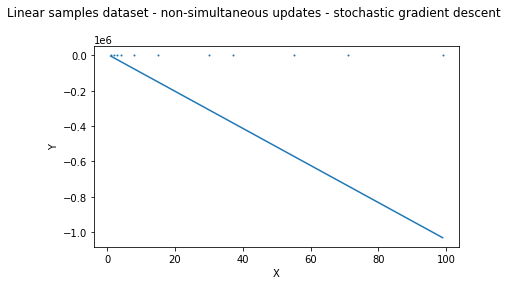

In [120]:
# plot the distribution + the resulting parameters
fig, axs = plt.subplots(1, 1)
fig.suptitle('Linear samples dataset - non-simultaneous updates - stochastic gradient descent')
axs.scatter(X, y_true, s=1)
axs.set_xlabel('X')
axs.set_ylabel('Y')
n = np.linspace(min(X), max(X), 10)
axs.plot(n, t0 + t1 * n)
plt.tight_layout()
plt.show()

#### Example 2 - few linear samples 

In [121]:
X = np.array([1, 2, 3, 4])
y_true = np.array([1, 2, 3, 4])

#random initial parameter initialization
t0 = 1
t1 = 5

nb_epochs = 50

1. simultaneous updates

1. a. mini-batch gradient descent

In [128]:
# mini-batch gradient descent

#create a random batch
batch_size = 5
random_indices = np.random.choice(len(X), batch_size)
X_batch = X[random_indices]
y_batch = y_true[random_indices]

# calculate gradient descent
for i in range(nb_epochs):
    t0, t1 = linear_regression_sim(t0, t1, X_batch, y_batch)
    print("epoch ", i, " theta0 = ", t0, " theta1 = ", t1)

epoch  0  theta0 =  0.5437989699324722  theta1 =  3.6520269301922355
epoch  1  theta0 =  0.5374207117161168  theta1 =  3.6343880054911923
epoch  2  theta0 =  0.5310876373923201  theta1 =  3.6168724742913714
epoch  3  theta0 =  0.5247994303114868  theta1 =  3.5994794721485017
epoch  4  theta0 =  0.5185557760424486  theta1 =  3.5822081406744957
epoch  5  theta0 =  0.5123563623569223  theta1 =  3.5650576274950203
epoch  6  theta0 =  0.5062008792140763  theta1 =  3.548027086207366
epoch  7  theta0 =  0.5000890187452061  theta1 =  3.5311156763386093
epoch  8  theta0 =  0.4940204752385159  theta1 =  3.5143225633040704
epoch  9  theta0 =  0.48799494512400843  theta1 =  3.4976469183660606
epoch  10  theta0 =  0.48201212695847906  theta1 =  3.481087918592918
epoch  11  theta0 =  0.47607172141061616  theta1 =  3.4646447468183337
epoch  12  theta0 =  0.4701734312462052  theta1 =  3.448316591600957
epoch  13  theta0 =  0.46431696131343686  theta1 =  3.4321026471842893
epoch  14  theta0 =  0.458502

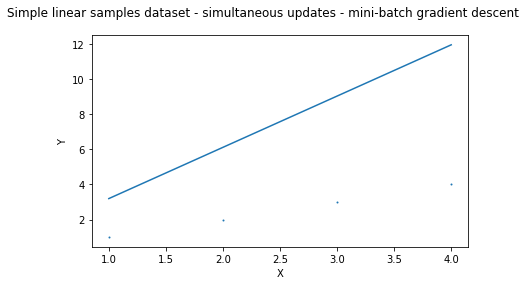

In [129]:
# plot the distribution + the resulting parameters
fig, axs = plt.subplots(1, 1)
fig.suptitle('Simple linear samples dataset - simultaneous updates - mini-batch gradient descent')
axs.scatter(X, y_true, s=1)
axs.set_xlabel('X')
axs.set_ylabel('Y')
n = np.linspace(min(X), max(X), 10)
axs.plot(n, t0 + t1 * n)
plt.tight_layout()
plt.show()

1. b. batch gradient descent

In [130]:
# batch gradient descent

#reinitialize the parameters
t0 = 1
t1 = 5

# calculate gradient descent
for i in range(nb_epochs):
    t0, t1 = linear_regression_sim(t0, t1, X, y_true)
    print("epoch ", i, " theta0 = ", t0, " theta1 = ", t1)

epoch  0  theta0 =  0.989  theta1 =  4.9675
epoch  1  theta0 =  0.97809225  theta1 =  4.93527125
epoch  2  theta0 =  0.967275979625  theta1 =  4.903311485000001
epoch  3  theta0 =  0.956550424932875  theta1 =  4.871618458913438
epoch  4  theta0 =  0.9459148283606585  theta1 =  4.840189944409254
epoch  5  theta0 =  0.9353684386712747  theta1 =  4.809023732755283
epoch  6  theta0 =  0.9249105109007152  theta1 =  4.77811763366294
epoch  7  theta0 =  0.9145403063056571  theta1 =  4.747469475133216
epoch  8  theta0 =  0.9042570923115184  theta1 =  4.717077103303953
epoch  9  theta0 =  0.894060142460947  theta1 =  4.686938382298394
epoch  10  theta0 =  0.8839487363627401  theta1 =  4.657051194075004
epoch  11  theta0 =  0.8739221596411898  theta1 =  4.627413438278535
epoch  12  theta0 =  0.8639797038858523  theta1 =  4.598023032092343
epoch  13  theta0 =  0.8541206666017356  theta1 =  4.568877910091937
epoch  14  theta0 =  0.844344351159904  theta1 =  4.539976024099743
epoch  15  theta0 =  0

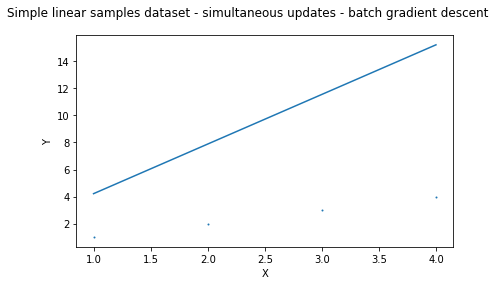

In [131]:
# plot the distribution + the resulting parameters
fig, axs = plt.subplots(1, 1)
fig.suptitle('Simple linear samples dataset - simultaneous updates - batch gradient descent')
axs.scatter(X, y_true, s=1)
axs.set_xlabel('X')
axs.set_ylabel('Y')
n = np.linspace(min(X), max(X), 10)
axs.plot(n, t0 + t1 * n)
plt.tight_layout()
plt.show()

1. c. stochastic gradient descent

In [126]:
# stochastic gradient descent

#reinitialize the parameters
t0 = 1
t1 = 5

# calculate gradient descent
for i in range(nb_epochs):

    #get a random sample
    batch_size = 1
    random_indices = np.random.choice(len(X), batch_size)

    X_batch = X[random_indices]
    y_batch = y_true[random_indices]
    
    t0, t1 = linear_regression_sim(t0, t1, X_batch, y_batch)
    print("epoch ", i, " theta0 = ", t0, " theta1 = ", t1)

epoch  0  theta0 =  0.995  theta1 =  4.995
epoch  1  theta0 =  0.986015  theta1 =  4.97703
epoch  2  theta0 =  0.9691208649999999  theta1 =  4.90945346
epoch  3  theta0 =  0.9642422906749999  theta1 =  4.904574885675
epoch  4  theta0 =  0.9476597488416248  theta1 =  4.8382447183415005
epoch  5  theta0 =  0.9313591102194172  theta1 =  4.77304216385267
epoch  6  theta0 =  0.9228816667814924  theta1 =  4.756087276976821
epoch  7  theta0 =  0.9182026978377341  theta1 =  4.751408308033063
epoch  8  theta0 =  0.9097816785238303  theta1 =  4.734566269405255
epoch  9  theta0 =  0.8976681980370907  theta1 =  4.698225827945036
epoch  10  theta0 =  0.8819776265272735  theta1 =  4.635463541905767
epoch  11  theta0 =  0.8738247218169347  theta1 =  4.619157732485089
epoch  12  theta0 =  0.8693317393626326  theta1 =  4.614664750030787
epoch  13  theta0 =  0.8612330781232085  theta1 =  4.598467427551939
epoch  14  theta0 =  0.8567733776175334  theta1 =  4.594007727046264
epoch  15  theta0 =  0.8451345

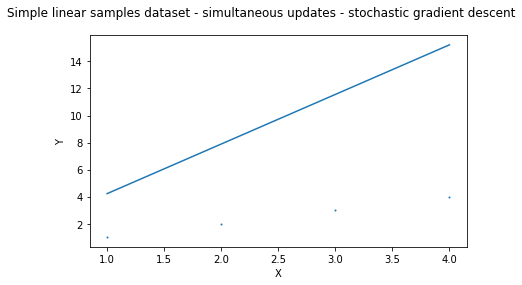

In [127]:
# plot the distribution + the resulting parameters
fig, axs = plt.subplots(1, 1)
fig.suptitle('Simple linear samples dataset - simultaneous updates - stochastic gradient descent')
axs.scatter(X, y_true, s=1)
axs.set_xlabel('X')
axs.set_ylabel('Y')
n = np.linspace(min(X), max(X), 10)
axs.plot(n, t0 + t1 * n)
plt.tight_layout()
plt.show()

2. non-simultaneous parameter updates

2. a. mini-batch gradient descent

In [132]:
# mini-batch gradient descent

#create a random batch
batch_size = 5
random_indices = np.random.choice(len(X), batch_size)
X_batch = X[random_indices]
y_batch = y_true[random_indices]

# calculate gradient descent
for i in range(nb_epochs):
    t0, t1 = linear_regression_nsim(0, t0, t1, X_batch, y_batch)
    t0, t1 = linear_regression_nsim(1, t0, t1, X_batch, y_batch)
    print("epoch ", i, " theta0 = ", t0, " theta1 = ", t1)

epoch  0  theta0 =  0.5428648250017817  theta1 =  3.650265809889124
epoch  1  theta0 =  0.5364913753950238  theta1 =  3.6337139871658977
epoch  2  theta0 =  0.5301607132478637  theta1 =  3.61727209247119
epoch  3  theta0 =  0.5238725539311793  theta1 =  3.6009393947162085
epoch  4  theta0 =  0.5176266147088724  theta1 =  3.584715167674495
epoch  5  theta0 =  0.5114226147252796  theta1 =  3.568598689949587
epoch  6  theta0 =  0.5052602749926652  theta1 =  3.5525892449428955
epoch  7  theta0 =  0.4991393183787982  theta1 =  3.5366861208217935
epoch  8  theta0 =  0.49305946959461144  theta1 =  3.520888610487919
epoch  9  theta0 =  0.4870204551819434  theta1 =  3.505196011545689
epoch  10  theta0 =  0.481022003501361  theta1 =  3.489607626271021
epoch  11  theta0 =  0.47506384472006336  theta1 =  3.474122761580265
epoch  12  theta0 =  0.4691457107998667  theta1 =  3.4587407289993397
epoch  13  theta0 =  0.46326733548526833  theta1 =  3.443460844633076
epoch  14  theta0 =  0.457428454291590

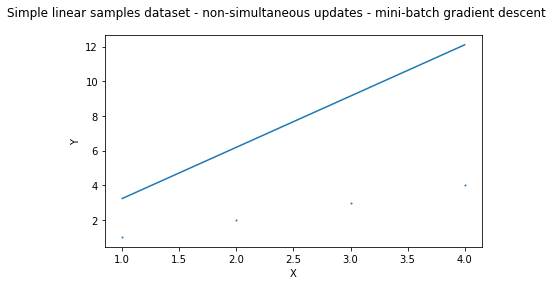

In [133]:
# plot the distribution + the resulting parameters
fig, axs = plt.subplots(1, 1)
fig.suptitle('Simple linear samples dataset - non-simultaneous updates - mini-batch gradient descent')
axs.scatter(X, y_true, s=1)
axs.set_xlabel('X')
axs.set_ylabel('Y')
n = np.linspace(min(X), max(X), 10)
axs.plot(n, t0 + t1 * n)
plt.tight_layout()
plt.show()

2. a. batch gradient descent

In [134]:
# batch gradient descent

#reinitialize the parameters
t0 = 1
t1 = 5

# calculate gradient descent
for i in range(nb_epochs):
    t0, t1 = linear_regression_nsim(0, t0, t1, X, y_true)
    t0, t1 = linear_regression_nsim(1, t0, t1, X, y_true)
    print("epoch ", i, " theta0 = ", t0, " theta1 = ", t1)

epoch  0  theta0 =  0.989  theta1 =  4.9675275
epoch  1  theta0 =  0.97809218125  theta1 =  4.935325813296875
epoch  2  theta0 =  0.9672757745355078  theta1 =  4.90339268026081
epoch  3  theta0 =  0.9565500170603203  theta1 =  4.871725860116203
epoch  4  theta0 =  0.9459141523929695  theta1 =  4.840323130784349
epoch  5  theta0 =  0.9353674304136157  theta1 =  4.809182288727433
epoch  6  theta0 =  0.9249091072613835  theta1 =  4.778301148793823
epoch  7  theta0 =  0.9145384452821376  theta1 =  4.747677544064665
epoch  8  theta0 =  0.9042547129766938  theta1 =  4.717309325701738
epoch  9  theta0 =  0.8940571849494627  theta1 =  4.6871943627966015
epoch  10  theta0 =  0.8839451418575218  theta1 =  4.657330542220984
epoch  11  theta0 =  0.8739178703601118  theta1 =  4.627715768478426
epoch  12  theta0 =  0.8639746630685556  theta1 =  4.598347963557166
epoch  13  theta0 =  0.8541148184965942  theta1 =  4.569225066784246
epoch  14  theta0 =  0.844337641011137  theta1 =  4.540345034680836
ep

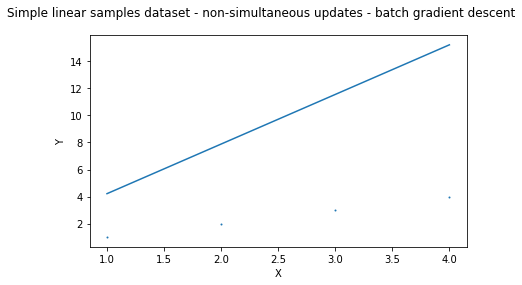

In [135]:
# plot the distribution + the resulting parameters
fig, axs = plt.subplots(1, 1)
fig.suptitle('Simple linear samples dataset - non-simultaneous updates - batch gradient descent')
axs.scatter(X, y_true, s=1)
axs.set_xlabel('X')
axs.set_ylabel('Y')
n = np.linspace(min(X), max(X), 10)
axs.plot(n, t0 + t1 * n)
plt.tight_layout()
plt.show()

2. c. stochastic gradient descent

In [136]:
# stochastic gradient descent

#reinitialize the parameters
t0 = 1
t1 = 5

# calculate gradient descent
for i in range(nb_epochs):

    #get a random sample
    batch_size = 1
    random_indices = np.random.choice(len(X), batch_size)

    X_batch = X[random_indices]
    y_batch = y_true[random_indices]
    
    t0, t1 = linear_regression_nsim(0, t0, t1, X_batch, y_batch)
    t0, t1 = linear_regression_nsim(1, t0, t1, X_batch, y_batch)
    print("epoch ", i, " theta0 = ", t0, " theta1 = ", t1)

epoch  0  theta0 =  0.983  theta1 =  4.932068
epoch  1  theta0 =  0.966288728  theta1 =  4.865289757088
epoch  2  theta0 =  0.961457149514912  theta1 =  4.860463010181397
epoch  3  theta0 =  0.9527747663450343  theta1 =  4.843115608607982
epoch  4  theta0 =  0.9441357603614733  theta1 =  4.825854874652827
epoch  5  theta0 =  0.9278882051025005  theta1 =  4.760929643837972
epoch  6  theta0 =  0.92319938725356  theta1 =  4.7562455148068805
epoch  7  theta0 =  0.9185199423514996  theta1 =  4.751570749349722
epoch  8  theta0 =  0.9025951394117492  theta1 =  4.687935236802479
epoch  9  theta0 =  0.8869408033251275  theta1 =  4.6253805098003395
epoch  10  theta0 =  0.871552340482601  theta1 =  4.563888212281603
epoch  11  theta0 =  0.8671168999298368  theta1 =  4.559457207169392
epoch  12  theta0 =  0.8520119542012293  theta1 =  4.499097844037877
epoch  13  theta0 =  0.8371635508708766  theta1 =  4.439763624329787
epoch  14  theta0 =  0.8328866236956759  theta1 =  4.435490974081762
epoch  15

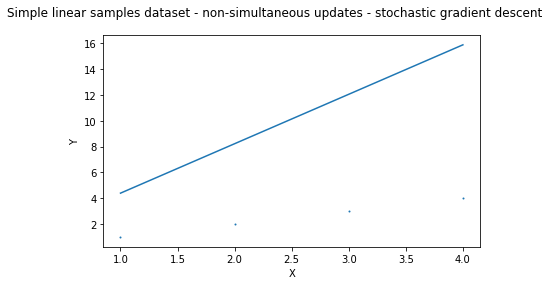

In [137]:
# plot the distribution + the resulting parameters
fig, axs = plt.subplots(1, 1)
fig.suptitle('Simple linear samples dataset - non-simultaneous updates - stochastic gradient descent')
axs.scatter(X, y_true, s=1)
axs.set_xlabel('X')
axs.set_ylabel('Y')
n = np.linspace(min(X), max(X), 10)
axs.plot(n, t0 + t1 * n)
plt.tight_layout()
plt.show()

#### Example 3 - complex sample distribution, different parameter initialization

In this part we will compare the simultaneous gradient descent convergence with the previous examples

In [24]:
from sklearn import datasets
from matplotlib import pyplot as plt

# Load a toy dataset
diabetes = datasets.load_diabetes(as_frame=True)

In [25]:
#extract the data
X = diabetes['data']['bmi']
y_true = diabetes['target']

X.shape, y_true.shape

((442,), (442,))

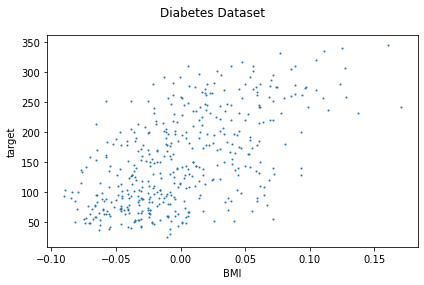

In [26]:
# plot the initial distribution
fig, axs = plt.subplots(1, 1)
fig.suptitle('Diabetes Dataset')
axs.scatter(X, y_true, s=1)
axs.set_xlabel('BMI')
axs.set_ylabel('target')
plt.tight_layout()
plt.show()

In [27]:
alpha = 0.1

#random initial parameter initialization
t0 = 12
t1 = 3

nb_epochs = 500

In [28]:
def linear_regression_sim(theta0, theta1, x, y):

    y_pred = []

    #calculate the estimated values
    for i in range(len(x)):
        y_pred.append(h_theta(theta0, theta1, x[i]))

    #simultaneous parameter update
    theta0 = theta0 - alpha * (np.sum(np.array(y_pred) - y) / len(x))
    theta1 = theta1 - alpha * (np.sum((np.array(y_pred) - y) * x) / len(x))

    return theta0, theta1

In [29]:
# mini-batch gradient descent

#create a random batch
batch_size = 50
random_indices = np.random.choice(len(X), batch_size)
X_batch = []
for i in range(len(random_indices)):
    X_batch.append(X[random_indices[i]])

y_batch = y_true[random_indices]

# calculate gradient descent
for i in range(nb_epochs):
    t0, t1 = linear_regression_sim(t0, t1, X_batch, y_batch)
    print("epoch ", i, " theta0 = ", t0, " theta1 = ", t1)

epoch  0  theta0 =  23.752308000439328  theta1 =  3.0893251532749137
epoch  1  theta0 =  34.329453921665724  theta1 =  3.1876719149979142
epoch  2  theta0 =  43.848960912225905  theta1 =  3.2941341902971337
epoch  3  theta0 =  52.416599108722785  theta1 =  3.4078965000011374
epoch  4  theta0 =  60.12756100672357  theta1 =  3.528224918531207
epoch  5  theta0 =  67.06751928760522  theta1 =  3.654458918058147
epoch  6  theta0 =  73.31357885644083  theta1 =  3.7860040282917886
epoch  7  theta0 =  78.93513367045028  theta1 =  3.922325230335082
epoch  8  theta0 =  83.99463787952352  theta1 =  4.062941011191962
epoch  9  theta0 =  88.54829984811744  theta1 =  4.2074180128597
epoch  10  theta0 =  92.64670677084641  theta1 =  4.355366216543747
epoch  11  theta0 =  96.33538682280884  theta1 =  4.506434608479672
epoch  12  theta0 =  99.65531509154668  theta1 =  4.660307279198608
epoch  13  theta0 =  102.64336891280794  theta1 =  4.816699912889288
epoch  14  theta0 =  105.33273767003217  theta1 = 

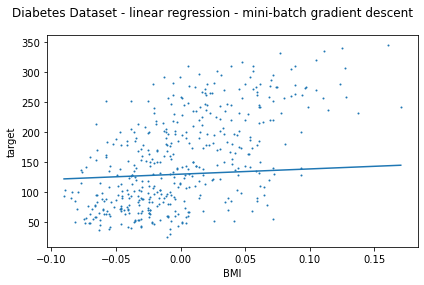

In [48]:
# plot the distribution + the resulting parameters
fig, axs = plt.subplots(1, 1)
fig.suptitle('Diabetes Dataset - linear regression - mini-batch gradient descent')
axs.scatter(X, y_true, s=1)
axs.set_xlabel('BMI')
axs.set_ylabel('target')
n = np.linspace(min(X), max(X), 10)
axs.plot(n, t0 + t1 * n)
plt.tight_layout()
plt.show()

In [49]:
# batch gradient descent

#reinitialize the parameters
t0 = 1
t1 = 5

# calculate gradient descent
for i in range(nb_epochs):
    t0, t1 = linear_regression_sim(t0, t1, X, y_true)
    print("epoch ", i, " theta0 = ", t0, " theta1 = ", t1)

epoch  0  theta0 =  16.113348416289597  theta1 =  5.213673135833501
epoch  1  theta0 =  29.71536199095023  theta1 =  5.427297929328579
epoch  2  theta0 =  41.9571742081448  theta1 =  5.640874391422415
epoch  3  theta0 =  52.974805203619916  theta1 =  5.854402533049715
epoch  4  theta0 =  62.89067309954752  theta1 =  6.067882365142711
epoch  5  theta0 =  71.81495420588236  theta1 =  6.281313898631161
epoch  6  theta0 =  79.84680720158372  theta1 =  6.494697144442353
epoch  7  theta0 =  87.07547489771494  theta1 =  6.708032113501099
epoch  8  theta0 =  93.58127582423305  theta1 =  6.921318816729743
epoch  9  theta0 =  99.43649665809933  theta1 =  7.134557265048153
epoch  10  theta0 =  104.70619540857899  theta1 =  7.347747469373733
epoch  11  theta0 =  109.44892428401069  theta1 =  7.560889440621411
epoch  12  theta0 =  113.71738027189922  theta1 =  7.773983189703649
epoch  13  theta0 =  117.55899066099889  theta1 =  7.987028727530438
epoch  14  theta0 =  121.01644001118859  theta1 =  8.

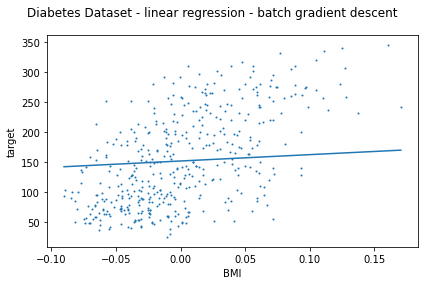

In [50]:
# plot the distribution + the resulting parameters
fig, axs = plt.subplots(1, 1)
fig.suptitle('Diabetes Dataset - linear regression - batch gradient descent')
axs.scatter(X, y_true, s=1)
axs.set_xlabel('BMI')
axs.set_ylabel('target')
n = np.linspace(min(X), max(X), 10)
axs.plot(n, t0 + t1 * n)
plt.tight_layout()
plt.show()

In [53]:
# stochastic gradient descent

#reinitialize the parameters
t0 = 1
t1 = 5

#get a random sample
batch_size = 1
random_indices = np.random.choice(len(X), batch_size)
X_batch = []
for i in range(len(random_indices)):
    X_batch.append(X[random_indices[i]])

y_batch = y_true[random_indices]

# calculate gradient descent
for i in range(nb_epochs):
    
    t0, t1 = linear_regression_sim(t0, t1, X_batch, y_batch)
    print("epoch ", i, " theta0 = ", t0, " theta1 = ", t1)

epoch  0  theta0 =  22.316575627991416  theta1 =  4.293328744679084
epoch  1  theta0 =  41.49915098921561  theta1 =  3.657402278469198
epoch  2  theta0 =  58.76136063821062  theta1 =  3.0851383475660725
epoch  3  theta0 =  74.29545219549982  theta1 =  2.5701637018896477
epoch  4  theta0 =  88.27442739142975  theta1 =  2.106743116791732
epoch  5  theta0 =  100.85396877032227  theta1 =  1.6897155203934542
epoch  6  theta0 =  112.17417351246552  theta1 =  1.3144365152086084
epoch  7  theta0 =  122.36111368335784  theta1 =  0.9767266539215744
epoch  8  theta0 =  131.528240286555  theta1 =  0.6728248932719673
epoch  9  theta0 =  139.77764675692634  theta1 =  0.39934670766626595
epoch  10  theta0 =  147.2012059657269  theta1 =  0.15324639603161835
epoch  11  theta0 =  153.88159340020454  theta1 =  -0.06821683787323621
epoch  12  theta0 =  159.89320791279863  theta1 =  -0.2675094094503432
epoch  13  theta0 =  165.30300029422773  theta1 =  -0.4468508215010667
epoch  14  theta0 =  170.171218898

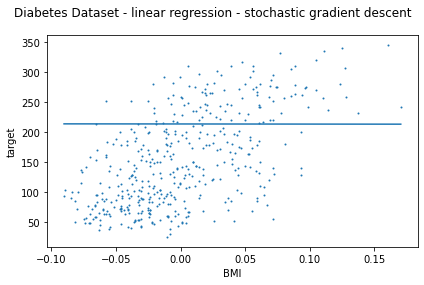

In [54]:
# plot the distribution + the resulting parameters
fig, axs = plt.subplots(1, 1)
fig.suptitle('Diabetes Dataset - linear regression - stochastic gradient descent')
axs.scatter(X, y_true, s=1)
axs.set_xlabel('BMI')
axs.set_ylabel('target')
n = np.linspace(min(X), max(X), 10)
axs.plot(n, t0 + t1 * n)
plt.tight_layout()
plt.show()

In [70]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(np.array(X).reshape(-1,1), np.array(y_true).reshape(-1,1))
#the coefficients
intercept = reg.intercept_[0]
coefficients = reg.coef_[0]

#the equation
equation = f'h(theta) = {intercept:.2f} + {coefficients[0]:.2f} * x'
print(equation)

h(theta) = 152.13 + 949.44 * x


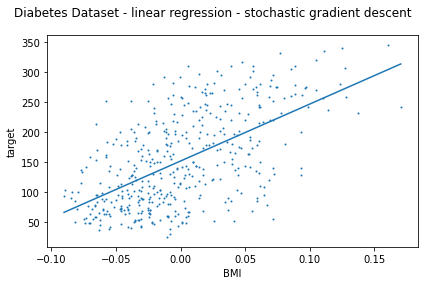

In [71]:
# plot the distribution + the resulting parameters
fig, axs = plt.subplots(1, 1)
fig.suptitle('Diabetes Dataset - linear regression - stochastic gradient descent')
axs.scatter(X, y_true, s=1)
axs.set_xlabel('BMI')
axs.set_ylabel('target')
n = np.linspace(min(X), max(X), 10)
axs.plot(n, intercept + coefficients * n)
plt.tight_layout()
plt.show()